# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

# Project Overview

This project is part of the Udacity Data Scientist program. This project used to create the data simulates how people make purchasing decisions and how those decisions are influenced by promotional offers. The given simulated data for the sake of testing algorithms, not simulated data for the sake of mimicking real people.

# Project Statement
The goal of this project is to build a model to see whether the people who receive the offer will complete the offer.

The approach to solving these two questions are as follows:
- Data Exploration
- Data Preprocessing(cleaning)
- Questions and Visualization
- Modeling
- Conclusion
- Improvements

# Metrics

- Supervised machine learning model is used (random forest classifier)
- Unsupervised machine learning model is used (artificial nueral network)
- using models to predict whether user will complete offer.


# Data Exploration

In [1]:
import pandas as pd
import numpy as np
import math
import json
%matplotlib inline
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

C:\Users\User\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\User\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\User\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


## Portfolio dataset

In [2]:
portfolio.head()

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [3]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


In [4]:
portfolio.shape

(10, 6)

In [5]:
portfolio.isna().sum()

reward        0
channels      0
difficulty    0
duration      0
offer_type    0
id            0
dtype: int64

In [6]:
portfolio['offer_type'].value_counts()

discount         4
bogo             4
informational    2
Name: offer_type, dtype: int64

In [7]:
portfolio['id'].nunique()

10

In [8]:
portfolio.columns.duplicated().sum()

0

From the portfolio dataset, following things are observed:

1.This dataset has no missing values nor duplicates.

2.There are 10 unique offers.

3.There are 4 Discount offers, 4 Bogo Offers and 2 informational offers.

## Profile dataset

In [9]:
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [10]:
profile.shape

(17000, 5)

In [11]:
profile.isna().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

In [12]:
profile[profile.isnull().any(axis=1)]

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
6,None,118,8ec6ce2a7e7949b1bf142def7d0e0586,20170925,NaN
7,None,118,68617ca6246f4fbc85e91a2a49552598,20171002,NaN
...,...,...,...,...,...
16980,None,118,5c686d09ca4d475a8f750f2ba07e0440,20160901,NaN
16982,None,118,d9ca82f550ac4ee58b6299cf1e5c824a,20160415,NaN
16989,None,118,ca45ee1883624304bac1e4c8a114f045,20180305,NaN
16991,None,118,a9a20fa8b5504360beb4e7c8712f8306,20160116,NaN


In [13]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [14]:
profile['id'].nunique()

17000

In [15]:
profile['gender'].unique()

array([None, 'F', 'M', 'O'], dtype=object)

In [16]:
profile.columns.duplicated().sum()

0

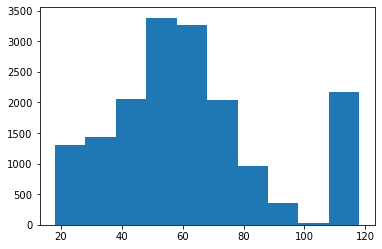

In [17]:
plt.hist(profile['age'], bins=10);

In [18]:
profile.age.value_counts()

118    2175
58      408
53      372
51      363
54      359
       ... 
100      12
96        8
98        5
99        5
101       5
Name: age, Length: 85, dtype: int64

In [19]:
profile.gender.value_counts()

M    8484
F    6129
O     212
Name: gender, dtype: int64

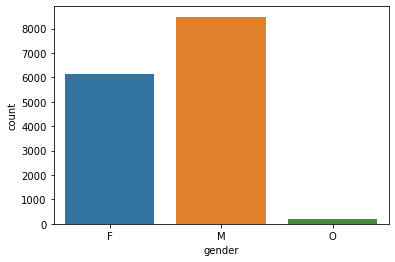

In [20]:
sns.countplot(profile['gender'])

In [21]:
profile['age'].describe()

count    17000.000000
mean        62.531412
std         26.738580
min         18.000000
25%         45.000000
50%         58.000000
75%         73.000000
max        118.000000
Name: age, dtype: float64

In [22]:
profile['income'].describe()

count     14825.000000
mean      65404.991568
std       21598.299410
min       30000.000000
25%       49000.000000
50%       64000.000000
75%       80000.000000
max      120000.000000
Name: income, dtype: float64

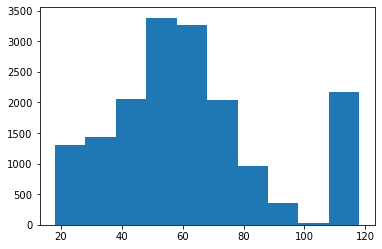

In [23]:
plt.hist(profile['age'], bins=10);

Following things are observed from the profile dataset:

1.This dataset has no duplicates.

2.This dataset has 2175 missing values on 'gender', 'income'.

3.With above exploration and visualizaton with users age=118, I think it is the mobile app default setting for users who doesn't give his/her basic info for the gender and income variables.

4.Male users are more than Female users than Others.


## Transcript dataset

In [24]:
transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [25]:
transcript.shape

(306534, 4)

In [26]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [27]:
transcript.isna().sum()

person    0
event     0
value     0
time      0
dtype: int64

In [28]:
transcript.columns.duplicated().sum()

0

In [29]:
transcript.event.unique()

array(['offer received', 'offer viewed', 'transaction', 'offer completed'],
      dtype=object)

In [30]:
transcript.event.value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

From the transcript dataset, following things are observed:

1.There are 306534 rows in total.

2.There is no missing value nor duplicates.

3.There are 4 types of events in this dataset: 'transaction', 'offer received', 'offer viewed' and 'offer completed'.

# Data Preprocessing

### Portfolio dataset

In [31]:
# create a copy from the dataset
portfolio_clean = portfolio.copy()

In [32]:
portfolio_clean.head()

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [33]:
# rename 'id' column to 'offer_id'
portfolio_clean.rename(columns={'id':'offer_id'},inplace=True)

In [34]:
portfolio_clean['channels']

0         [email, mobile, social]
1    [web, email, mobile, social]
2            [web, email, mobile]
3            [web, email, mobile]
4                    [web, email]
5    [web, email, mobile, social]
6    [web, email, mobile, social]
7         [email, mobile, social]
8    [web, email, mobile, social]
9            [web, email, mobile]
Name: channels, dtype: object

Since channels is a categorical column, I will create dummy variables for it.


In [35]:
portfolio_clean['channel_email'] = portfolio_clean['channels'].apply(lambda x: 1 if 'email' in x else 0)
portfolio_clean['channel_mobile'] = portfolio_clean['channels'].apply(lambda x: 1 if 'mobile' in x else 0)
portfolio_clean['channel_social'] = portfolio_clean['channels'].apply(lambda x: 1 if 'social' in x else 0)
portfolio_clean['channel_web'] = portfolio_clean['channels'].apply(lambda x: 1 if 'web' in x else 0)

In [36]:
portfolio_clean[['channels','channel_email','channel_mobile','channel_web','channel_social']].head()

,channels,channel_email,channel_mobile,channel_web,channel_social
0,"[email, mobile, social]",1,1,0,1
1,"[web, email, mobile, social]",1,1,1,1
2,"[web, email, mobile]",1,1,1,0
3,"[web, email, mobile]",1,1,1,0
4,"[web, email]",1,0,1,0


In [37]:
# drop the 'channels'column
portfolio_clean.drop('channels', axis=1, inplace=True)

In [38]:
portfolio_clean.head()

,reward,difficulty,duration,offer_type,offer_id,channel_email,channel_mobile,channel_social,channel_web
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1
2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,0,1
3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1
4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1


Since offer_type is a catergorical column, I will create dummy variables for it.

In [39]:
portfolio_clean['offer_type_bogo'] = portfolio_clean['offer_type'].apply(lambda x: 1 if 'bogo' in x else 0)
portfolio_clean['offer_type_informational'] = portfolio_clean['offer_type'].apply(lambda x: 1 if 'informational' in x else 0)
portfolio_clean['offer_type_discount'] = portfolio_clean['offer_type'].apply(lambda x: 1 if 'social' in x else 0)

In [40]:
portfolio_clean.head()

,reward,difficulty,duration,offer_type,offer_id,channel_email,channel_mobile,channel_social,channel_web,offer_type_bogo,offer_type_informational,offer_type_discount
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0,1,0,0
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1,1,0,0
2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,0,1,0,1,0
3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1,1,0,0
4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1,0,0,0


## Profile dataset

In [41]:
profile_clean = profile.copy()

In [42]:
profile_clean.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [43]:
# renaming 'id' column name to ''user_id'.
profile_clean.rename(columns={'id':'user_id'},inplace=True)

Extract year & month info from became_member_on column.

In [44]:
profile_clean['became_member_on'] = pd.to_datetime(profile_clean['became_member_on'], format = '%Y%m%d')

In [45]:
profile_clean['membership_year'] = profile_clean['became_member_on'].dt.year

In [46]:
profile_clean['membership_month'] = profile_clean['became_member_on'].dt.month

In [47]:
profile_clean['membership_date'] = profile_clean['became_member_on'].dt.day

In [48]:
profile_clean.head()

,gender,age,user_id,became_member_on,income,membership_year,membership_month,membership_date
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN,2017,2,12
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,2017,7,15
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN,2018,7,12
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,2017,5,9
4,None,118,a03223e636434f42ac4c3df47e8bac43,2017-08-04,NaN,2017,8,4


In [49]:
# replacing 'age = 118' by NaN value
profile_clean['age'] = profile_clean['age'].apply(lambda x: np.nan if x == 118 else x)

In [50]:
# dropping rows with NaNs in 'age', 'gender' and 'income' columns
profile_clean.dropna(inplace=True)

In [51]:
profile_clean.isna().sum()

gender              0
age                 0
user_id             0
became_member_on    0
income              0
membership_year     0
membership_month    0
membership_date     0
dtype: int64

Since gender is a categorical column, I will create the dummy variables for it. 

In [52]:
profile_clean['gender_M'] = profile_clean['gender'].apply(lambda x: 1 if 'M' in x else 0)
profile_clean['gender_F'] = profile_clean['gender'].apply(lambda x: 1 if 'F' in x else 0)
profile_clean['gender_O'] = profile_clean['gender'].apply(lambda x: 1 if 'O' in x else 0)

In [53]:
profile_clean.drop(['became_member_on'], axis=1, inplace=True)

In [54]:
profile_clean.head()

,gender,age,user_id,income,membership_year,membership_month,membership_date,gender_M,gender_F,gender_O
1,F,55.0,0610b486422d4921ae7d2bf64640c50b,112000.0,2017,7,15,0,1,0
3,F,75.0,78afa995795e4d85b5d9ceeca43f5fef,100000.0,2017,5,9,0,1,0
5,M,68.0,e2127556f4f64592b11af22de27a7932,70000.0,2018,4,26,1,0,0
8,M,65.0,389bc3fa690240e798340f5a15918d5c,53000.0,2018,2,9,1,0,0
12,M,58.0,2eeac8d8feae4a8cad5a6af0499a211d,51000.0,2017,11,11,1,0,0


## Transcript dataset

In [55]:
transcript_clean = transcript.copy()

In [56]:
# rename 'person' to 'user_id'
transcript_clean.rename(columns={'person': 'user_id'}, inplace=True)

In [57]:
transcript_clean.head()

,user_id,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [58]:
# Extract each key that exist in 'value' column to a seperate column.
# getting the different keys  that exists in the 'value' column
keys = []
for idx, row in transcript_clean.iterrows():
    for k in row['value']:
        if k in keys:
            continue
        else:
            keys.append(k)

In [59]:
keys

['offer id', 'amount', 'offer_id', 'reward']

In [60]:
#create columns and specify the datatype of each of them
transcript_clean['offer_id'] = '' # datatype : string
transcript_clean['amount'] = 0  # datatype : integer
transcript_clean['reward'] = 0  # datatype : integer

In [61]:
# Iterating over transcript_clean dataset and checking 'value' column
# then updating it and using the values to fill in the columns created above
for idx, row in transcript_clean.iterrows():
    for k in row['value']:
        if k == 'offer_id' or k == 'offer id': # b/c 'offer_id' and 'offer id' are representing the same thing 
            transcript_clean.at[idx, 'offer_id'] = row['value'][k]
        if k == 'amount':
            transcript_clean.at[idx, 'amount'] = row['value'][k]
        if k == 'reward':
            transcript_clean.at[idx, 'reward'] = row['value'][k]

In [62]:
# filling all the NaNs in the 'offer_id' column with 'N/A' values
transcript_clean['offer_id'] = transcript_clean['offer_id'].apply(lambda x: 'N/A' if x == '' else x)


In [63]:
# drop the 'value' column 
transcript_clean.drop(columns=['value','amount','reward'], axis=1, inplace=True)

In [64]:
transcript_clean.head()

,user_id,event,time,offer_id
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0


In [65]:
# check the unique values in 'event' column
transcript['event'].unique()

array(['offer received', 'offer viewed', 'transaction', 'offer completed'],
      dtype=object)

In [66]:
# create 'offer received', 'offer viewed', 'transaction', 'offer completed' columns in the dataset
transcript_clean['offer_received'] = transcript_clean['event'].apply(lambda x: 1 if 'offer received' in x else 0)
transcript_clean['offer_viewed'] = transcript_clean['event'].apply(lambda x: 1 if 'offer viewed' in x else 0)
transcript_clean['transaction'] = transcript_clean['event'].apply(lambda x: 1 if 'transaction' in x else 0)
transcript_clean['offer_completed'] = transcript_clean['event'].apply(lambda x: 1 if 'offer completed' in x else 0)

In [67]:
transcript_clean.head()

,user_id,event,time,offer_id,offer_received,offer_viewed,transaction,offer_completed
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,0,0,0
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,0
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,1,0,0,0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4,1,0,0,0
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0,1,0,0,0


## Merge three clean dataset( Portfolio, Profile, Transaction) into one master clean dataset.

In [68]:
# merge 'transcript_clean' dataset with 'portfolio_clean' on 'offer_id'
df_master =transcript_clean.merge(portfolio_clean,how='left',on='offer_id')

In [69]:
# merge'df_master' dataset with 'profile_clean' on 'user_id'
df_master = df_master.merge(profile_clean,how ='left', on = 'user_id')

In [70]:
df_master.head()

,user_id,event,time,offer_id,offer_received,offer_viewed,transaction,offer_completed,reward,difficulty,...,offer_type_discount,gender,age,income,membership_year,membership_month,membership_date,gender_M,gender_F,gender_O
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,0,0,0,5.0,5.0,...,0.0,F,75.0,100000.0,2017.0,5.0,9.0,0.0,1.0,0.0
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,0,5.0,20.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,1,0,0,0,2.0,10.0,...,0.0,M,68.0,70000.0,2018.0,4.0,26.0,1.0,0.0,0.0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4,1,0,0,0,2.0,10.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0,1,0,0,0,10.0,10.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306534 entries, 0 to 306533
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   user_id                   306534 non-null  object 
 1   event                     306534 non-null  object 
 2   time                      306534 non-null  int64  
 3   offer_id                  306534 non-null  object 
 4   offer_received            306534 non-null  int64  
 5   offer_viewed              306534 non-null  int64  
 6   transaction               306534 non-null  int64  
 7   offer_completed           306534 non-null  int64  
 8   reward                    167581 non-null  float64
 9   difficulty                167581 non-null  float64
 10  duration                  167581 non-null  float64
 11  offer_type                167581 non-null  object 
 12  channel_email             167581 non-null  float64
 13  channel_mobile            167581 non-null  f

In [72]:
# removing rows that contain NaNs
df_master = df_master.dropna(how='any',axis=0)

In [73]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148805 entries, 0 to 306527
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   user_id                   148805 non-null  object 
 1   event                     148805 non-null  object 
 2   time                      148805 non-null  int64  
 3   offer_id                  148805 non-null  object 
 4   offer_received            148805 non-null  int64  
 5   offer_viewed              148805 non-null  int64  
 6   transaction               148805 non-null  int64  
 7   offer_completed           148805 non-null  int64  
 8   reward                    148805 non-null  float64
 9   difficulty                148805 non-null  float64
 10  duration                  148805 non-null  float64
 11  offer_type                148805 non-null  object 
 12  channel_email             148805 non-null  float64
 13  channel_mobile            148805 non-null  f

# Questions and Visualization

## Questions

1.What is the most common age distribution for Starbucks customers?

2.What is the most common income for Starbucks customers?

3.Who gets more income, male or female?

4.Which type of offers each gender likes?

5.From all the offers that customers reviewed, how many offers they completed?

6.How many new customers Starbucks gets each year?

7.What is the income among different ages, at what ages would have the most disposable income?


1.What is the most common age distribution for Starbucks customers?

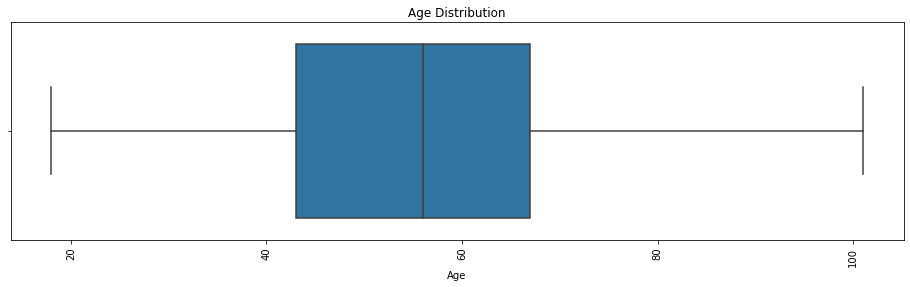

In [74]:
plt.figure(figsize=(16, 4))
sns.boxplot(df_master['age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.xticks(rotation = 90)
plt.show();

From the above age distribution plot, we can see that most of ages in our profile dataframe falls in-between 40 and 80. We already notice one outlier which is 118. 

2.What is the most common income for Starbucks customers?

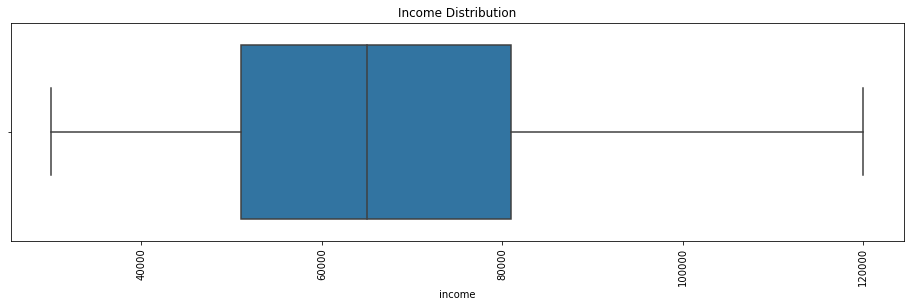

In [75]:
plt.figure(figsize=(16, 4))
sns.boxplot(df_master['income'])
plt.title('Income Distribution')
plt.xlabel('income')
plt.xticks(rotation = 90)
plt.show();

From the above income distribution plot, we can see that the most common of income for the customers that falls between 50K and 80K.

3.Who gets more income, male or female?

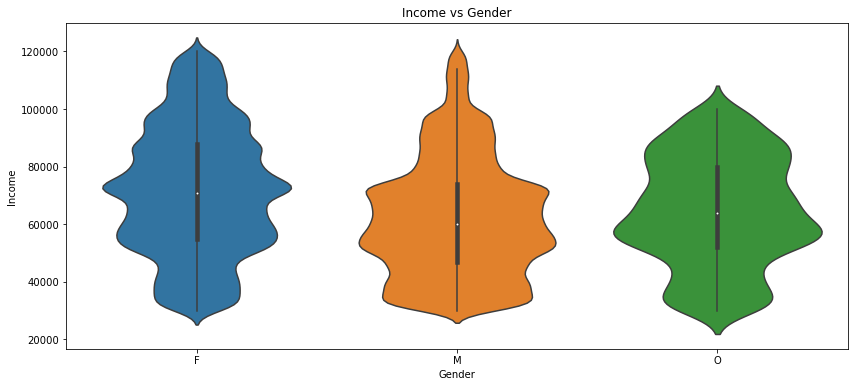

In [76]:
plt.figure(figsize=(14, 6))
sns.violinplot(x=df_master[df_master['gender'] != 'NA']['gender'], y=df_master['income'])
plt.title('Income vs Gender')
plt.ylabel('Income')
plt.xlabel('Gender')
plt.xticks(rotation = 0)
plt.show();


The graph above shows that income median (the white dot) for females (around 70k) is higher than males (around 60k). We can also see that the income range for females is 40k to 100k. The income range for the males is 40k to 70k which close to median.

4.Which type of offers each gender likes?

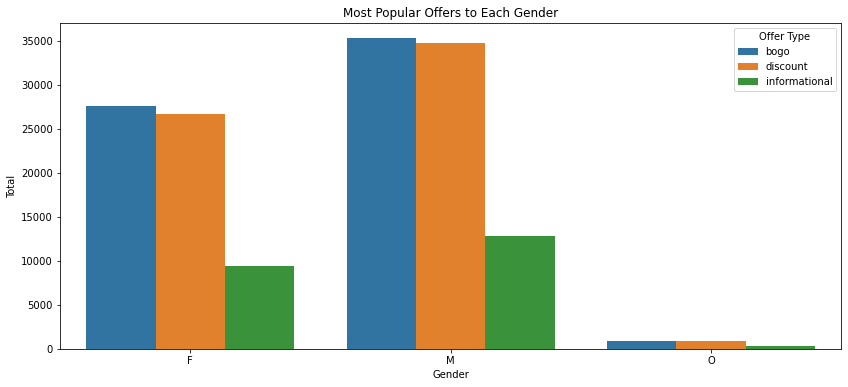

In [77]:
plt.figure(figsize=(14, 6))
sns.countplot(x=df_master[df_master["gender"] != 'NA']['gender'], hue="offer_type", data=df_master)
plt.title('Most Popular Offers to Each Gender')
plt.ylabel('Total')
plt.xlabel('Gender')
plt.xticks(rotation = 0)
plt.legend(title='Offer Type')
plt.show();

From the above plot graph, we can see that both genders like bogo and discount offers and they have the same reaction to informational offers, they both not interested in it.



5.From all the offers that customers reviewed, how many offers they completed?

In [78]:
total_trans_g_o = df_master[df_master["gender"]!= 'NA'].groupby(['gender','offer_type']).count()
total_trans_g_e = df_master[df_master["gender"]!= 'NA'].groupby(['gender','event']).count()
total_trans_go_o_t = total_trans_g_o.loc[('F')]['event'].sum()
total_trans_go_o_tt = total_trans_g_o.loc[('M')]['event'].sum()
total_trans_go_o_t_offers_f = total_trans_g_o.loc[('F')].loc[['bogo', 'discount', 'informational']]['event'].sum()
total_trans_go_o_t_offers_m = total_trans_g_o.loc[('M')].loc[['bogo', 'discount', 'informational']]['event'].sum()

In [79]:

print('For Females:')
print(f"Number of offer completed: {total_trans_g_e.loc[('F', 'offer completed')].values[0]}, {round((total_trans_g_e.loc[('F', 'offer completed')].values[0]/total_trans_g_e.loc[('F', 'offer received')].values[0])*100,2)}% of total offers received.")
print(f"Number of offer received: {total_trans_g_e.loc[('F', 'offer received')].values[0]}, {round((total_trans_g_e.loc[('F', 'offer received')].values[0]/total_trans_go_o_t_offers_f)*100,2)}% of total.")
print(f"Number of offer viewed: {total_trans_g_e.loc[('F', 'offer viewed')].values[0]}, {round((total_trans_g_e.loc[('F', 'offer viewed')].values[0]/total_trans_go_o_t_offers_f)*100,2)}% of total.")
print(f"Number of transaction: {total_trans_g_e.loc[('F', 'transaction')].values[0]}, {round((total_trans_g_e.loc[('F', 'transaction')].values[0]/total_trans_go_o_t)*100,2)}% of total.")

print('\nFor Males:')
print(f"Number of offer completed: {total_trans_g_e.loc[('M', 'offer completed')].values[0]}, {round((total_trans_g_e.loc[('M', 'offer completed')].values[0]/total_trans_g_e.loc[('M', 'offer received')].values[0])*100,2)}% of total offers received.")
print(f"Number of offer received: {total_trans_g_e.loc[('M', 'offer received')].values[0]}, {round((total_trans_g_e.loc[('M', 'offer received')].values[0]/total_trans_go_o_t_offers_m)*100,2)}% of total.")
print(f"Number of offer viewed: {total_trans_g_e.loc[('M', 'offer viewed')].values[0]}, {round((total_trans_g_e.loc[('M', 'offer viewed')].values[0]/total_trans_go_o_t_offers_m)*100,2)}% of total.")
print(f"Number of transaction: {total_trans_g_e.loc[('M', 'transaction')].values[0]}, {round((total_trans_g_e.loc[('M', 'transaction')].values[0]/total_trans_go_o_t)*100,2)}% of total.")

For Females:
Number of offer completed: 15477, 56.37% of total offers received.
Number of offer received: 27456, 43.09% of total.
Number of offer viewed: 20786, 32.62% of total.
Number of transaction: 15477, 24.29% of total.

For Males:
Number of offer completed: 16466, 43.18% of total offers received.
Number of offer received: 38129, 46.0% of total.
Number of offer viewed: 28301, 34.14% of total.
Number of transaction: 16466, 25.84% of total.


Females completed 56% of the offers they received, it is 13% more than males, but males made more transactions than females, 25% to 24%.

6.How many new customers Starbucks gets each year?

In [80]:
df_master['membership_year'] = df_master['membership_year'].astype(int)

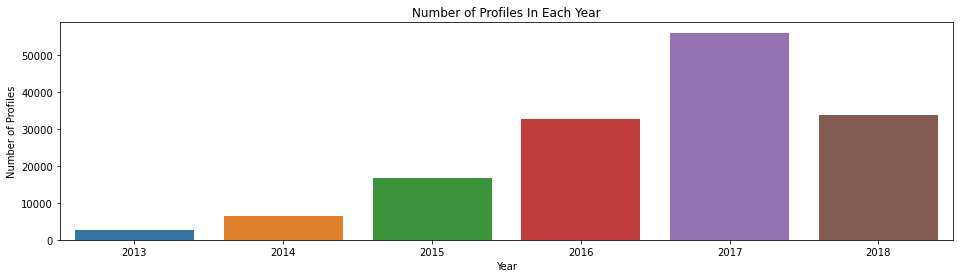

In [81]:
plt.figure(figsize=(16, 4))
sns.countplot(df_master['membership_year'])
plt.title('Number of Profiles In Each Year')
plt.ylabel('Number of Profiles')
plt.xlabel('Year')
plt.xticks()
plt.show();

In [82]:
# getting the number of customers that became members on 2017
members_2017 = (df_master['membership_year']==2017).sum()

# getting the total number of members among all the available years
total = df_master['membership_year'].count()

# getting the percentages of customers that became members on 2017
perc_2017 = round((members_2017/total)*100,2)

print(members_2017)
perc_2017

56063


37.68

From the above plot graph we can see that, 2017 has the highest number of profiles. About 38% of all the customers are registered as members on 2017.

7.What is the income among different ages, at what ages would have the most disposable income?

In [83]:
dataAge = profile.groupby('age')['income'].sum().reset_index()
dataAge.head()

,age,income
0,18,3516000.0
1,19,6834000.0
2,20,6806000.0
3,21,7040000.0
4,22,6534000.0


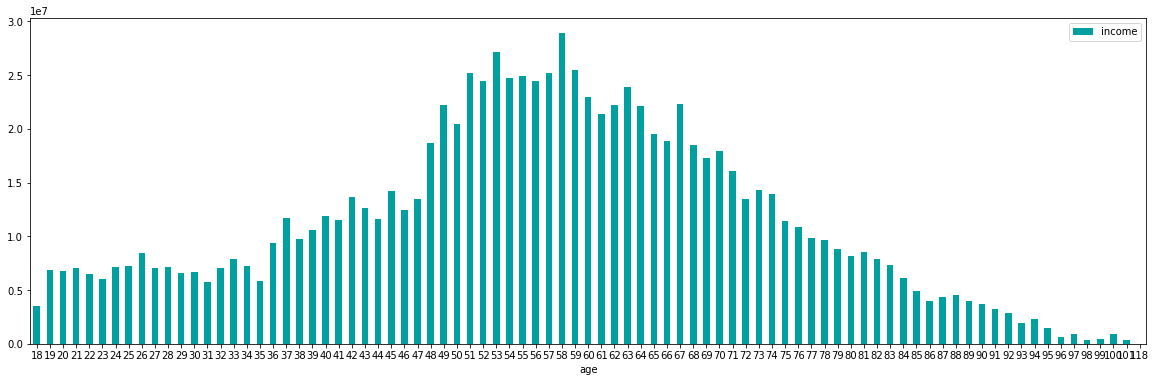

In [84]:
dataAge.plot.bar(x='age', y='income', rot=0, figsize=(20,6),color = '#00A0A0')

The age group with the most disposable income is between age 48 and 70.

# Data Modeling

### Data Prep


In [85]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148805 entries, 0 to 306527
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   user_id                   148805 non-null  object 
 1   event                     148805 non-null  object 
 2   time                      148805 non-null  int64  
 3   offer_id                  148805 non-null  object 
 4   offer_received            148805 non-null  int64  
 5   offer_viewed              148805 non-null  int64  
 6   transaction               148805 non-null  int64  
 7   offer_completed           148805 non-null  int64  
 8   reward                    148805 non-null  float64
 9   difficulty                148805 non-null  float64
 10  duration                  148805 non-null  float64
 11  offer_type                148805 non-null  object 
 12  channel_email             148805 non-null  float64
 13  channel_mobile            148805 non-null  f

In [86]:
# dropping all columns that have been encoded or not needed for training model
df_model = df_master.drop(columns = ['event','user_id','time','offer_id','transaction','offer_type','gender','offer_received','offer_viewed'])

In [87]:
#moving the y denpendent variable to the first column
col_name = "offer_completed"
first_col = df_model.pop(col_name)
df_model.insert(0, col_name, first_col)
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148805 entries, 0 to 306527
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   offer_completed           148805 non-null  int64  
 1   reward                    148805 non-null  float64
 2   difficulty                148805 non-null  float64
 3   duration                  148805 non-null  float64
 4   channel_email             148805 non-null  float64
 5   channel_mobile            148805 non-null  float64
 6   channel_social            148805 non-null  float64
 7   channel_web               148805 non-null  float64
 8   offer_type_bogo           148805 non-null  float64
 9   offer_type_informational  148805 non-null  float64
 10  offer_type_discount       148805 non-null  float64
 11  age                       148805 non-null  float64
 12  income                    148805 non-null  float64
 13  membership_year           148805 non-null  i

In [88]:
X = df_model.iloc[:, 1:].values
y = df_model.iloc[:, 0].values

In [89]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [90]:
#splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Supervised Model

In [91]:
#training classifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [92]:
#evaluating classifier with confusion matrix

from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[20112  3169]
 [ 6452    28]]


In [93]:
#evluating classifier with k-fold cross-validation

from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(estimator = classifier, X= X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracy.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracy.std()*100))

Accuracy: 66.74 %
Standard Deviation: 0.32 %


In [94]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148805 entries, 0 to 306527
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   offer_completed           148805 non-null  int64  
 1   reward                    148805 non-null  float64
 2   difficulty                148805 non-null  float64
 3   duration                  148805 non-null  float64
 4   channel_email             148805 non-null  float64
 5   channel_mobile            148805 non-null  float64
 6   channel_social            148805 non-null  float64
 7   channel_web               148805 non-null  float64
 8   offer_type_bogo           148805 non-null  float64
 9   offer_type_informational  148805 non-null  float64
 10  offer_type_discount       148805 non-null  float64
 11  age                       148805 non-null  float64
 12  income                    148805 non-null  float64
 13  membership_year           148805 non-null  i

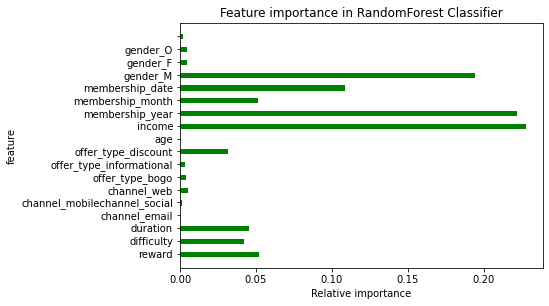

<Figure size 360x360 with 0 Axes>

In [95]:
# Feature importance in RandomForest Classifier
col = [ 'reward','difficulty','duration','channel_email','channel_mobile' 
       'channel_social', 'channel_web', 'offer_type_bogo','offer_type_informational','offer_type_discount','age','income',
       'membership_year','membership_month','membership_date','gender_M','gender_F','gender_O']
#modelname.feature_importance_
imp = classifier.feature_importances_
#plot
fig, ax = plt.subplots() 
width = 0.4 # the width of the bars 
ind = np.arange(len(imp)) # the x locations for the groups
ax.barh(ind, imp, width, color='green')
ax.set_yticks(ind+width/10)
ax.set_yticklabels(col, minor=False)
plt.title('Feature importance in RandomForest Classifier')
plt.xlabel('Relative importance')
plt.ylabel('feature') 
plt.figure(figsize=(5,5))
fig.set_size_inches(6.5, 4.5, forward=True)

## Unsupervised model

In [109]:
import tensorflow as tf


In [110]:
#Training artificial neural network
ann = tf.keras.models.Sequential()

In [111]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [112]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [113]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [114]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [115]:

ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
119044/119044 [==============================] - 3s 23us/sample - loss: 0.4872 - acc: 0.7781
Epoch 2/100
119044/119044 [==============================] - 3s 22us/sample - loss: 0.4738 - acc: 0.7819
Epoch 3/100
119044/119044 [==============================] - 3s 22us/sample - loss: 0.4728 - acc: 0.7819
Epoch 4/100
119044/119044 [==============================] - 3s 22us/sample - loss: 0.4724 - acc: 0.7819
Epoch 5/100
119044/119044 [==============================] - 3s 22us/sample - loss: 0.4721 - acc: 0.7819
Epoch 6/100
119044/119044 [==============================] - 3s 22us/sample - loss: 0.4718 - acc: 0.7819
Epoch 7/100
119044/119044 [==============================] - 3s 22us/sample - loss: 0.4717 - acc: 0.7819
Epoch 8/100
119044/119044 [==============================] - 3s 22us/sample - loss: 0.4716 - acc: 0.7819
Epoch 9/100
119044/119044 [==============================] - 3s 22us/sample - loss: 0.4715 - acc: 0.7819
Epoch 10/100
119044/119044 [===========================

119044/119044 [==============================] - 3s 22us/sample - loss: 0.4707 - acc: 0.7819
Epoch 79/100
119044/119044 [==============================] - 3s 22us/sample - loss: 0.4707 - acc: 0.7819
Epoch 80/100
119044/119044 [==============================] - 3s 22us/sample - loss: 0.4707 - acc: 0.7819
Epoch 81/100
119044/119044 [==============================] - 3s 22us/sample - loss: 0.4707 - acc: 0.7819
Epoch 82/100
119044/119044 [==============================] - 3s 22us/sample - loss: 0.4707 - acc: 0.7819
Epoch 83/100
119044/119044 [==============================] - 3s 22us/sample - loss: 0.4707 - acc: 0.7819
Epoch 84/100
119044/119044 [==============================] - 3s 22us/sample - loss: 0.4707 - acc: 0.7819
Epoch 85/100
119044/119044 [==============================] - 3s 22us/sample - loss: 0.4706 - acc: 0.7819
Epoch 86/100
119044/119044 [==============================] - 3s 22us/sample - loss: 0.4707 - acc: 0.7819
Epoch 87/100
119044/119044 [==============================]

In [116]:
# evaluating ann model

y_pred1 = ann.predict(X_test)
y_pred1 = (y_pred1 > 0.5)
cm = confusion_matrix(y_test, y_pred1)
print(cm)

[[23281     0]
 [ 6480     0]]


- The artificial neural network has a higher accuracy(78.19%) than the random forest classifier(66.74%). However taking a closer look,it is obsereved that the artificial neural network model predicted all negative, which renderes the model unusable in real world situations.

- The random forest classifier has a lower accuracy then if just blindly picking negative, which also renders the model unusable.

- Looking at the data, to have better performing models, more variety of data must be collected.


# Conclusion

1.Data Visualization Analysis
- Most of ages in our profile dataframe falls in-between 40 and 80. There is one outlier which is 118.
- The most common of income for the customers that falls between 50K and 80K.
- Income median for females (around 70k) is higher than males (around 60k). We can also see that the income range for females is 40k to 100k. The income range for the males is 40k to 70k which close to median.
- Both genders like bogo and discount offers and they have the same reaction to informational offers, they both not interested in it.
- Females completed 56% of the offers they received, it is 13% more than males, but males made more transactions than females, 25% to 24%.
- 38% of all the customers are registered as members on 2017.
- The age group with the most disposable income is between age 48 and 70.

2.Data Modeling
- Unsupervised model(artificial neutral network) has a higher accuracy of 78.19% than supervised model( random forest classifier) which has 66.74% accuracy. However taking a closer look,it is obsereved that the artificial neural network model predicted all negative, which renderes the model unusable in real world situations.
- The random forest classifier has a lower accuracy then if just blindly picking negative, which also renders the model unusable.
- Looking at the data, to have better performing models, more variety of data must be collected.



# Improvements 

- The models are unsuable, to improve on that, more variety must be collected.

- Another way that maybe able to improve model is to dive deeper into the dataset. For example, if we base off of user_id and offer_id and can streamline wheter a user received - viewed -completed offer, and figureout the user stopped somewhere along the streamline. Maybe we can then better predict where the user will end in the streamline. But again, even in this case to better help make predictions, more variety of data may need to be collected.

- We can also look at improvements from a resource angle, for example, because Starbucks is has a presence internationally, location will be a main category. Do users from different locations around the world react differently to different offer? Can we then tune our model to more accurately pinpoint the type of offer to be sent according to location, and thus saving resources.